In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from statistics import mean as st_mean

from FH_Functions import opt_fracs, search_data

In [2]:
bestAction = np.load('./Policies/DP_bestAction_Uniform_lam4_N5_s501_A101.npy')

bestActionQL = np.load('./Policies/QL_bestAction_Uniform_lam4_N5_s501_A101.npy')

DQN_acts = np.load('./Policies/DQN_bestAction_Uniform_lam4_N5_s501_A101.npy')

# Gives improved rollout policy
Roll_acts =  np.load('./Policies/Rollout_bestAction_Uniform_lam4_N5_s501_A101.npy')

In [3]:
# VARIABLES CONTROL VALUES IN ALL FOLLOWING PARALLEL PROCESSES
lam = 0.4
Nstates = 501
delta = 1/Nstates
Nactions = 101

n_samples = 1000
np.random.seed(0)
thetas = np.random.random(n_samples)

FH_cost = []
DP_cost = []
QL_cost = [] 
QS_cost = []

FH_acts = np.zeros(5)
DP_acts = np.zeros(5)
QL_acts = np.zeros(5)

S501 = np.linspace(0,1,501)

N_step = 5
FhPol  = opt_fracs(N_step,lam)
QsPol  = (1/2 - lam/4)*np.ones(N_step)

for theta in thetas:
    FH_data = search_data()
    FH_data.uni_search(lam, theta, delta, S501, FhPol)
    FH_cost.append(FH_data.cost)

    DP_data = search_data()
    DP_data.uni_search_dist(lam, theta, delta, S501, bestAction[-N_step:, :])
    DP_cost.append(DP_data.cost)
    DP_acts += np.array(DP_data.acts)

    QL_data = search_data()
    QL_data.uni_search_dist(lam, theta, delta, S501, bestActionQL[-N_step:, :])
    QL_cost.append(QL_data.cost)
    QL_acts += np.array(QL_data.acts)

    QS_data = search_data()
    QS_data.uni_search(lam, theta, delta, S501, QsPol)
    QS_cost.append(QS_data.cost)

print("FH cost: %.4f"%st_mean(FH_cost))
print("DP cost: %.4f"%st_mean(DP_cost))
print("QL cost: %.4f"%st_mean(QL_cost))
print("QS cost: %.4f"%st_mean(QS_cost))
DP_acts /= 1000
QL_acts /= 1000

FH cost: 0.3232
DP cost: 0.3231
QL cost: 0.3441
QS cost: 0.3578


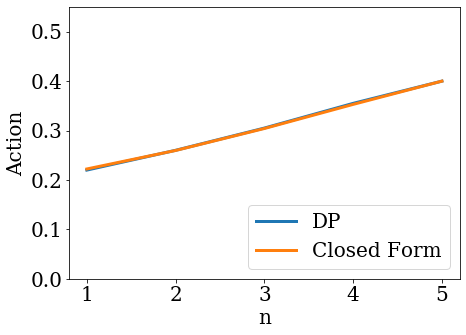

In [8]:
fig = plt.figure(figsize=(7,5))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)
a1 = fig.add_subplot(111)
steps = np.arange(1, 6)
plt.plot(steps, DP_acts, label='DP', linewidth=3)
plt.plot(steps, opt_fracs(5,0.4), label='Closed Form', linewidth=3)
plt.legend(loc='lower right',prop={'size': 20})
plt.ylim(0, 0.55)
a1.set_ylabel('Action',fontsize=20)
a1.set_xlabel('n',fontsize=20);

# fig1.tight_layout()
# fig1.savefig('DPUniformPolicyComparison.eps',bbox_inches='tight');

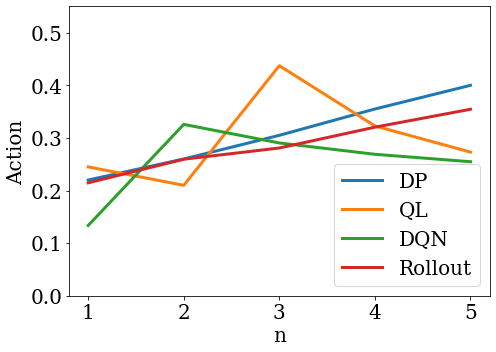

In [9]:
fig1 = plt.figure(figsize=(7,5))
plt.rc('font',family='serif')
plt.tick_params(labelsize=20)
a1 = fig1.add_subplot(111)

steps = np.arange(1, 6)
plt.plot(steps, DP_acts,label='DP', linewidth=3)
plt.plot(steps, QL_acts, label='QL', linewidth=3)
plt.plot(steps, DQN_acts, label='DQN', linewidth=3)
plt.plot(steps, Roll_acts, label='Rollout', linewidth=3)
plt.legend(loc='lower right', prop={'size': 20})
plt.ylim(0, 0.55)
a1.set_ylabel('Action',fontsize=20)
a1.set_xlabel('n',fontsize=20)
fig1.tight_layout()
# fig1.savefig('uniformPolicyComparison.eps',bbox_inches='tight');